In [141]:
ivv <- read.table('ivvtab.txt', sep = '\t', quote = '', comment.char = '', header =TRUE);

In [142]:
ivv$date <- gsub('\"', '', ivv$date);
ivv$date <- gsub('Jan', '01', ivv$date);
ivv$date <- gsub('Feb', '02', ivv$date);
ivv$date <- gsub('Mar', '03', ivv$date);
ivv$date <- gsub('Apr', '04', ivv$date);
ivv$date <- gsub('May', '05', ivv$date);
ivv$date <- gsub('Jun', '06', ivv$date);
ivv$date <- gsub('Jul', '07', ivv$date);
ivv$date <- gsub('Aug', '08', ivv$date);
ivv$date <- gsub('Sep', '09', ivv$date);
ivv$date <- gsub('Oct', '10', ivv$date);
ivv$date <- gsub('Nov', '11', ivv$date);
ivv$date <- gsub('Dec', '12', ivv$date);
ivv$date <- as.character(as.Date(ivv$date, '%m %d, %Y'))
ivv <- ivv[order(ivv$date, decreasing = FALSE),];
head(ivv)

,date,index,nav,outstanding
,<chr>,<dbl>,<dbl>,<dbl>
4970,2000-05-15,2007.03,145.24,150000
4969,2000-05-16,2025.96,146.60,150000
4968,2000-05-17,2000.94,144.79,150000
4967,2000-05-18,1986.40,143.74,150000
4966,2000-05-19,1944.65,140.73,150000
4965,2000-05-22,1936.04,140.11,2650000


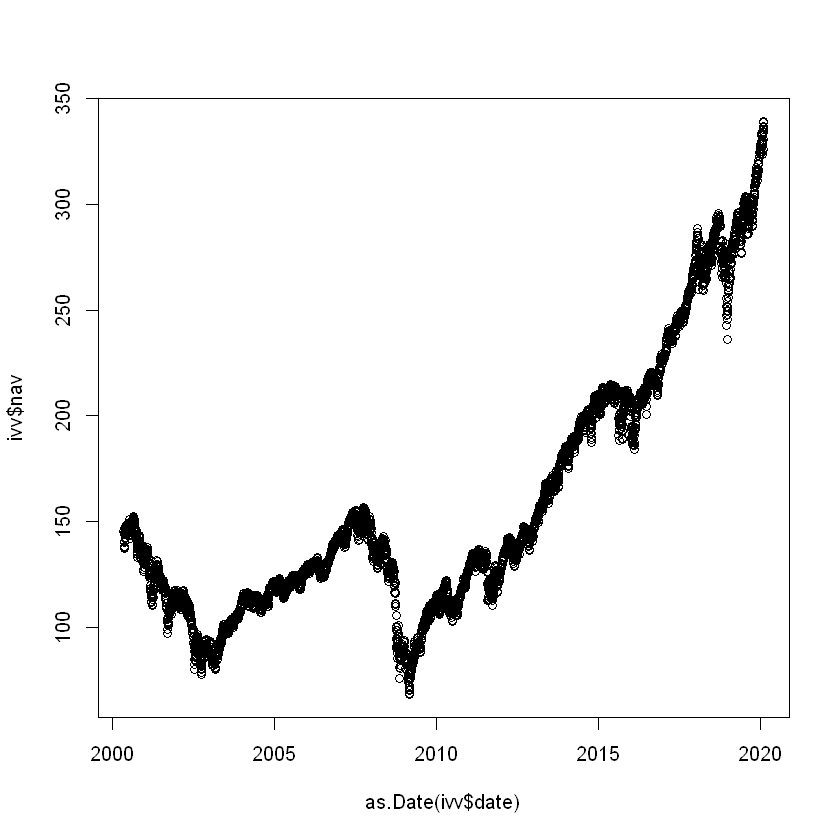

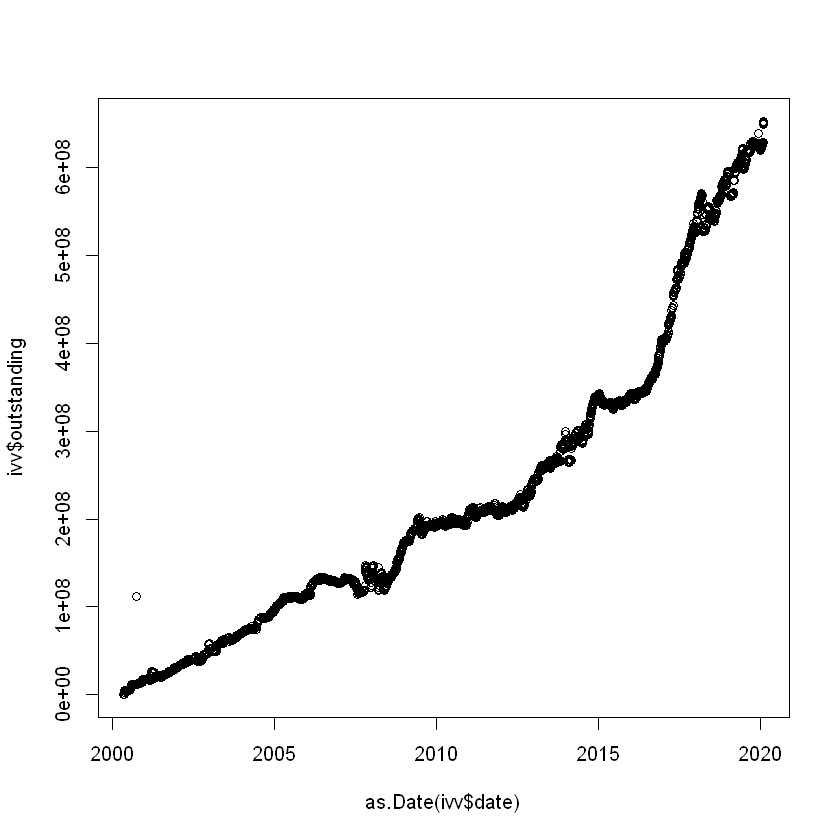

In [143]:
plot(as.Date(ivv$date), ivv$nav);
plot(as.Date(ivv$date), ivv$outstanding);

In [144]:
ivvpx <- read.table('IVV.csv', sep =',', quote = '', comment.char = '', header =T);

In [145]:
colnames(ivvpx) <- c('date', 'open', 'high', 'low', 'close', 'adjClose', 'volume');
ivv <- merge(ivv, ivvpx, by ='date');
head(ivv);

,date,index,nav,outstanding,open,high,low,close,adjClose,volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2000-05-19,1944.65,140.73,150000,142.6562,142.6562,140.2500,140.6875,96.70859,775500
2,2000-05-22,1936.04,140.11,2650000,140.5938,140.5938,136.8125,139.8125,96.10718,1850600
3,2000-05-23,1898.94,137.42,4650000,140.2188,140.2188,137.6875,137.6875,94.64642,373900
4,2000-05-24,1933.85,139.95,4650000,137.7500,140.0625,136.6562,139.7500,96.06415,400300
5,2000-05-25,1909.67,138.21,4650000,140.0312,140.9375,137.8750,138.4688,95.18346,69600
6,2000-05-26,1904.98,137.86,4650000,138.4844,138.7500,137.0000,137.8438,94.75383,237000


In [146]:
getDeltaPct <- function(x, d) {
    rs <- rep(NA, d);
    for(i in (d+1):length(x)) {
        rs <- c(rs, (x[i]-x[i-d])/x[i-d]);
    }
    return(rs)
}

In [158]:
delay <- 10;
ivv$doutPct <- getDeltaPct(ivv$outstanding, delay);
# proxy to buy-sell imblance
ivv$dclosePct <- getDeltaPct(ivv$close, delay);
ivv$volPct <- c(NA, ivv$volume[2:nrow(ivv)]/ivv$outstanding[1:(nrow(ivv)-1)]);
# arb flow
ivv$dev <- (ivv$close-ivv$nav)/ivv$close;
head(ivv)
summary(ivv)

,date,index,nav,outstanding,open,high,low,close,adjClose,volume,doutPct,dclosePct,volPct,dev
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000-05-19,1944.65,140.73,150000,142.6562,142.6562,140.2500,140.6875,96.70859,775500,NA,NA,NA,-0.0003020880
2,2000-05-22,1936.04,140.11,2650000,140.5938,140.5938,136.8125,139.8125,96.10718,1850600,NA,NA,12.33733333,-0.0021278498
3,2000-05-23,1898.94,137.42,4650000,140.2188,140.2188,137.6875,137.6875,94.64642,373900,NA,NA,0.14109434,0.0019428053
4,2000-05-24,1933.85,139.95,4650000,137.7500,140.0625,136.6562,139.7500,96.06415,400300,NA,NA,0.08608602,-0.0014311270
5,2000-05-25,1909.67,138.21,4650000,140.0312,140.9375,137.8750,138.4688,95.18346,69600,NA,NA,0.01496774,0.0018686527
6,2000-05-26,1904.98,137.86,4650000,138.4844,138.7500,137.0000,137.8438,94.75383,237000,NA,NA,0.05096774,-0.0001178871


     date               index           nav          outstanding       
 Length:4966        Min.   :1095   Min.   : 68.24   Min.   :   150000  
 Class :character   1st Qu.:1756   1st Qu.:115.22   1st Qu.:108100000  
 Mode  :character   Median :2164   Median :136.13   Median :195025000  
                    Mean   :2756   Mean   :159.63   Mean   :227660028  
                    3rd Qu.:3708   3rd Qu.:202.38   3rd Qu.:331237500  
                    Max.   :6873   Max.   :339.18   Max.   :653050000  
                                                                       
      open             high             low             close       
 Min.   : 68.16   Min.   : 70.13   Min.   : 67.22   Min.   : 68.19  
 1st Qu.:115.29   1st Qu.:116.01   1st Qu.:114.41   1st Qu.:115.30  
 Median :135.99   Median :136.85   Median :135.10   Median :136.01  
 Mean   :159.63   Mean   :160.46   Mean   :158.69   Mean   :159.63  
 3rd Qu.:202.56   3rd Qu.:203.43   3rd Qu.:201.18   3rd Qu.:202.40  
 Max.   :3

,date,msftOpen,msftHigh,msftLow,msftClose,msftAdjClose,msftVolume
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
2,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
3,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
4,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
5,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
6,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.061432,58435200


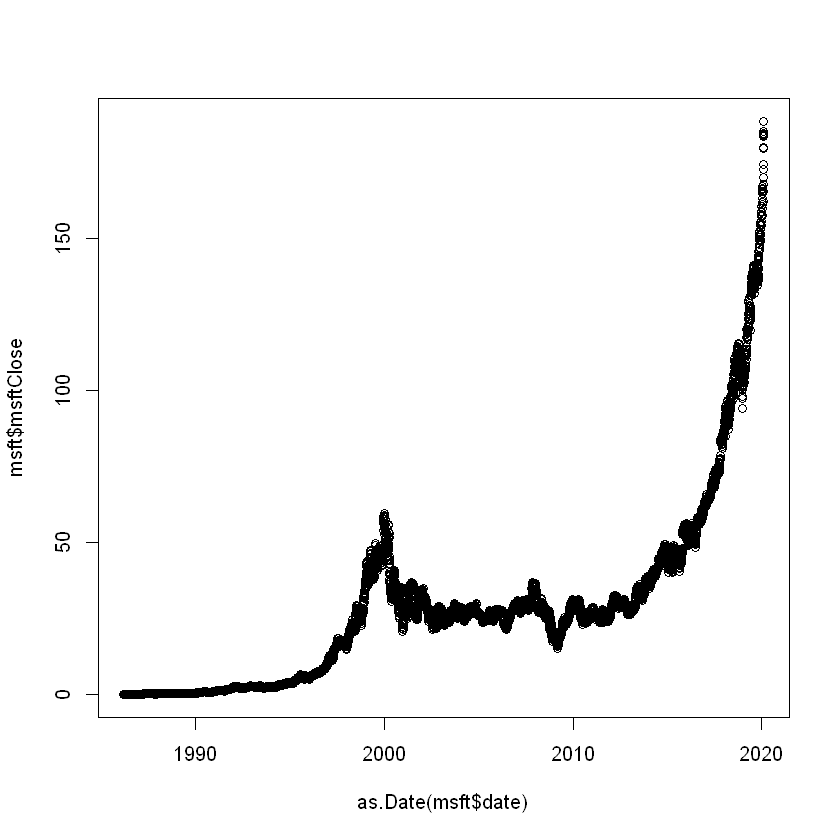

In [159]:
msft <- read.table('MSFT.csv', sep = ',', quote = '', comment.char = '', header =TRUE);
colnames(msft) <- c('date', 'msftOpen', 'msftHigh', 'msftLow', 'msftClose', 'msftAdjClose', 'msftVolume');
plot(as.Date(msft$date), msft$msftClose);
head(msft);

,date,msftOpen,msftHigh,msftLow,msftClose,msftAdjClose,msftVolume,logr
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800,NA
2,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000,0.03508919
3,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200,0.01710319
4,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400,-0.02576073
5,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400,-0.01754325
6,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.061432,58435200,-0.02690578


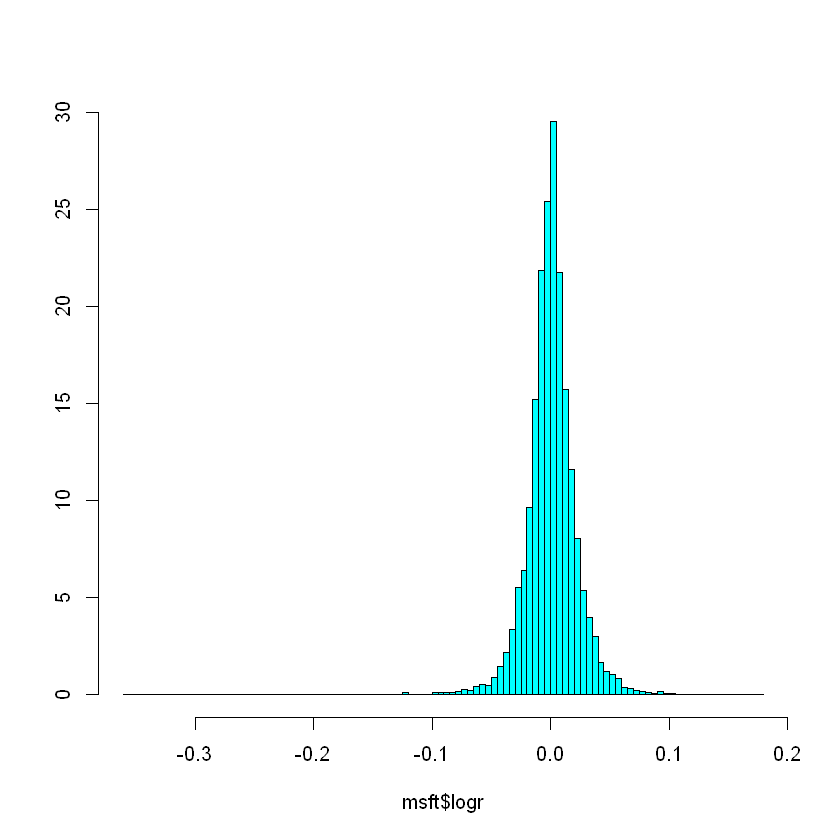

In [160]:
msft$logr <- c(NA, log(msft$msftClose[2:nrow(msft)]/msft$msftClose[1:(nrow(msft)-1)]));
library(MASS);
truehist(msft$logr);
head(msft);

In [161]:
getFutureReturn <- function(x, d) {
    rs <- c();
    for(i in 1:length(x)) {
        if((i+2+d)>length(x)) {
            rs <- c(rs, NA);
        }else{
            # get data on (t+1), enter position at (t+2)
            rs <- c(rs, sum(x[(i+3):(i+2+d)]));
        }
    }
    return(rs)
}

In [162]:
msft$log10r <- getFutureReturn(msft$logr, 10);
msft$log20r <- getFutureReturn(msft$logr, 20);
msft$log30r <- getFutureReturn(msft$logr, 30);

head(msft)

,date,msftOpen,msftHigh,msftLow,msftClose,msftAdjClose,msftVolume,logr,log10r,log20r,log30r
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800,NA,-0.079341668,-0.01710319,0.1121101
2,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000,0.03508919,-0.044449031,0.04256671,0.1148827
3,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200,0.01710319,-0.017856515,0.06840820,0.1168016
4,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400,-0.02576073,0.009049269,0.06169966,0.1437074
5,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400,-0.01754325,0.018517862,0.08934943,0.1634525
6,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.061432,58435200,-0.02690578,0.056085841,0.10053487,0.1997932


In [163]:
allData  <- merge(ivv, msft, by = 'date');
allData <- allData[1000:(nrow(allData)-32),]
summary(allData);
nrow(allData)

     date               index           nav          outstanding       
 Length:3935        Min.   :1095   Min.   : 68.24   Min.   : 74100000  
 Class :character   1st Qu.:1941   1st Qu.:123.11   1st Qu.:133250000  
 Mode  :character   Median :2366   Median :144.86   Median :213000000  
                    Mean   :3022   Mean   :170.34   Mean   :272192427  
                    3rd Qu.:3886   3rd Qu.:210.50   3rd Qu.:340675000  
                    Max.   :6571   Max.   :324.31   Max.   :639000000  
      open             high             low             close       
 Min.   : 68.16   Min.   : 70.13   Min.   : 67.22   Min.   : 68.19  
 1st Qu.:123.33   1st Qu.:123.83   1st Qu.:122.58   1st Qu.:123.14  
 Median :145.00   Median :145.62   Median :144.15   Median :144.88  
 Mean   :170.33   Mean   :171.17   Mean   :169.38   Mean   :170.34  
 3rd Qu.:210.57   3rd Qu.:211.33   3rd Qu.:209.72   3rd Qu.:210.56  
 Max.   :325.19   Max.   :325.19   Max.   :323.71   Max.   :324.32  
    adjClose 

[1] 3935

In [164]:
corMtx <- cor(allData[,2:ncol(allData)]);
print('10 day return:')
print(corMtx[which(rownames(corMtx) == 'log10r'),]);
print('20 day return:')
print(corMtx[which(rownames(corMtx) == 'log20r'),]);
print('30 day return:')
print(corMtx[which(rownames(corMtx) == 'log30r'),]);


[1] "10 day return:"
       index          nav  outstanding         open         high          low 
 0.094195699  0.088587864  0.106039317  0.088419738  0.088222671  0.089346510 
       close     adjClose       volume      doutPct    dclosePct       volPct 
 0.088595036  0.094144905  0.002415117 -0.050760845  0.042830983 -0.086805187 
         dev     msftOpen     msftHigh      msftLow    msftClose msftAdjClose 
 0.003148874  0.074185170  0.073703726  0.074552929  0.074124733  0.079668699 
  msftVolume         logr       log10r       log20r       log30r 
-0.144151221 -0.014322389  1.000000000  0.690271572  0.585648408 
[1] "20 day return:"
       index          nav  outstanding         open         high          low 
  0.13841600   0.12978066   0.15794025   0.12943992   0.12910767   0.13048249 
       close     adjClose       volume      doutPct    dclosePct       volPct 
  0.12974957   0.13830338   0.02022596  -0.10463420   0.07606634  -0.10725500 
         dev     msftOpen     msftHi

In [243]:
trainData <- allData[1:3735,];
testData <- allData[3736:nrow(allData),];
predictors <- c('doutPct', 'dclosePct', 'volPct', 'dev', 'volume');
# predictors <- setdiff(colnames(allData), c('date', 'logr', 'log10r', 'log20r', 'log30r'));
target <- 'log10r';

In [259]:
library(ranger);
trainRf <- function(data, target, predictors) {
    fmla <- as.formula(paste(target, '~', paste(predictors, sep = '', collapse = '+'), sep = ''));
    rf <- ranger(formula = fmla, data = data, num.trees = 100, sample.fraction = 0.6, importance = 'impurity');
  return(rf);
}

rf <- trainRf(trainData, target, predictors);
importance(rf)

doutPct dclosePct    volPct       dev    volume 
0.8020190 0.8017843 0.7832169 0.7454208 0.7007497

In [260]:
medPrediction <- function(rf, data) {
    return(apply(predict(rf,data, predict.all = TRUE)$predictions, 1, median));
}
trainData$rf <- medPrediction(rf, trainData[,predictors]);
testData$rf <- medPrediction(rf, testData[,predictors])

In [261]:
evalPrediction <- function(x, y) {
    return(t(data.frame(
        meanError = mean(x-y),
        medianError = median(x-y),
        meanAbsError = mean(abs(x-y)),
        medianAbsError = median(abs(x-y)),
        mse = mean((x-y)^2),
        sd = sd(x-y),
        cor = cor(x,y),
        rsq = 1 - sum((x-y)^2)/sum((x-mean(x))^2)
        
    )));
}
evalPrediction(trainData[,target],trainData$rf)
evalPrediction(testData[,target],testData$rf)

meanError,-0.0007555393
medianError,0.0000000000
meanAbsError,0.0132752232
medianAbsError,0.0071263452
mse,0.0004933238
sd,0.0222010117
cor,0.9335987133
rsq,0.7461340015


meanError,0.0053952147
medianError,0.0058290970
meanAbsError,0.0220087765
medianAbsError,0.0204389857
mse,0.0007682435
sd,0.0272552643
cor,0.0654182792
rsq,-0.0998959000
